In [91]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

d = {}

with open('memory_log.json') as f:
    d = json.load(f)

# Cenários:

# self.memLogger.define_log("pcd")
# self.memLogger.define_log("pcd_colorless")

# self.memLogger.define_log("octree")
# self.memLogger.define_log("octree_colorless")
# self.memLogger.define_log("octree_open3d")
# self.memLogger.define_log("octree_open3d_colorless")

# self.memLogger.define_log("voxel_grid")
# self.memLogger.define_log("voxel_grid_colorless")
# self.memLogger.define_log("voxel_grid_open3d")
# self.memLogger.define_log("voxel_grid_open3d_colorless")

# self.memLogger.define_log("only_octree")
# self.memLogger.define_log("only_octree_colorless")
# self.memLogger.define_log("only_octree_open3d")
# self.memLogger.define_log("only_octree_open3d_colorless")

# self.memLogger.define_log("only_voxel_grid")
# self.memLogger.define_log("only_voxel_grid_colorless")
# self.memLogger.define_log("only_voxel_grid_open3d")
# self.memLogger.define_log("only_voxel_grid_open3d_colorless")

# self.memLogger.define_log("low_level_world")
# self.memLogger.define_log("low_level_world_colorless")
# self.memLogger.define_log("high_level_world")
# self.memLogger.define_log("high_level_world_colorless")

# converting json dataset from dictionary to dataframe


In [107]:
def calculate_ticks(ax, ticks, round_to=0.1, center=False):
    upperbound = np.ceil(ax.get_ybound()[1]/round_to)
    lowerbound = np.floor(ax.get_ybound()[0]/round_to)
    dy = upperbound - lowerbound
    fit = np.floor(dy/(ticks - 1)) + 1
    dy_new = (ticks - 1)*fit
    if center:
        offset = np.floor((dy_new - dy)/2)
        lowerbound = lowerbound - offset
    values = np.linspace(lowerbound, lowerbound + dy_new, ticks)
    return values*round_to

In [92]:
def generic_5_analysis(name1, name2, name3, name4, name5, desc_name1, desc_name2, desc_name3, desc_name4, desc_name5, title):
    # octree
    df_colored = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored = df_colored.drop(['total'], axis=1).fillna(0)
    df_colored = df_colored.div(1000).round(2)

    df_colorless = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless = df_colorless.drop(['total'], axis=1).fillna(0)
    df_colorless = df_colorless.div(1000).round(2)
    
    df_colored2 = pd.DataFrame.from_dict(d[name3], orient='index')
    df_colored2 = df_colored2.drop(['total'], axis=1).fillna(0)
    df_colored2 = df_colored2.div(1000).round(2)

    df_colorless2 = pd.DataFrame.from_dict(d[name4], orient='index')
    df_colorless2 = df_colorless2.drop(['total'], axis=1).fillna(0)
    df_colorless2 = df_colorless2.div(1000).round(2)
    
    df_colored3 = pd.DataFrame.from_dict(d[name5], orient='index')
    df_colored3 = df_colored3.drop(['total'], axis=1).fillna(0)
    df_colored3 = df_colored3.div(1000).round(2)

    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colored_total2 = pd.DataFrame.from_dict(d[name3], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total2 = pd.DataFrame.from_dict(d[name4], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colored_total3 = pd.DataFrame.from_dict(d[name5], orient='index')['total'].fillna(0).div(1000).round(2)

    df_total = pd.concat([df_colored_total, df_colorless_total, df_colored_total2, df_colorless_total2, df_colored_total3], axis=1)

    fig = plt.figure(figsize=(14,14))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(3,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    
    ax1 = df_colored.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()

    ax2 = df_colorless.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()
    
    
    ax3 = df_colored2.plot.area(ax=ax3)
    ax3.title.set_text(desc_name3)
    ax3.set_xlabel("Steps")
    ax3.set_ylabel("Memory (kb)")
    ax3.grid()

    ax4 = df_colorless2.plot.area(ax=ax4)
    ax4.title.set_text(desc_name4)
    ax4.set_xlabel("Steps")
    ax4.set_ylabel("Memory (kb)")
    ax4.grid()
    
    ax5 = df_colored3.plot.area(ax=ax5)
    ax5.title.set_text(desc_name5)
    ax5.set_xlabel("Steps")
    ax5.set_ylabel("Memory (kb)")
    ax5.grid()

    ax6 = df_total.plot(ax=ax6)
    ax6.title.set_text('Total memory usage')
    ax6.set_xlabel("Steps")
    ax6.set_ylabel("Memory (kb)")
    ax6.grid()
    ax6.set_yscale('log')
    ax6.legend([desc_name1, desc_name2, desc_name3, desc_name4, desc_name5])

def generic_4_analysis(name1, name2, name3, name4, desc_name1, desc_name2, desc_name3, desc_name4, title):
    # octree
    df_colored = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored = df_colored.drop(['total'], axis=1).fillna(0)
    df_colored = df_colored.div(1000).round(2)

    df_colorless = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless = df_colorless.drop(['total'], axis=1).fillna(0)
    df_colorless = df_colorless.div(1000).round(2)
    
    df_colored2 = pd.DataFrame.from_dict(d[name3], orient='index')
    df_colored2 = df_colored2.drop(['total'], axis=1).fillna(0)
    df_colored2 = df_colored2.div(1000).round(2)

    df_colorless2 = pd.DataFrame.from_dict(d[name4], orient='index')
    df_colorless2 = df_colorless2.drop(['total'], axis=1).fillna(0)
    df_colorless2 = df_colorless2.div(1000).round(2)

    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colored_total2 = pd.DataFrame.from_dict(d[name3], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total2 = pd.DataFrame.from_dict(d[name4], orient='index')['total'].fillna(0).div(1000).round(2)
    
    df_total = pd.concat([df_colored_total, df_colorless_total, df_colored_total2, df_colorless_total2], axis=1)

    fig = plt.figure(figsize=(14,21))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(3,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, :])

    ax1 = df_colored.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()

    ax2 = df_colorless.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()
    
    
    ax3 = df_colored2.plot.area(ax=ax3)
    ax3.title.set_text(desc_name3)
    ax3.set_xlabel("Steps")
    ax3.set_ylabel("Memory (kb)")
    ax3.grid()

    ax4 = df_colorless2.plot.area(ax=ax4)
    ax4.title.set_text(desc_name4)
    ax4.set_xlabel("Steps")
    ax4.set_ylabel("Memory (kb)")
    ax4.grid()

    ax5 = df_total.plot(ax=ax5)
    ax5.title.set_text('Total memory usage')
    ax5.set_xlabel("Steps")
    ax5.set_ylabel("Memory (kb)")
    ax5.grid()
    ax5.legend([desc_name1, desc_name2, desc_name3, desc_name4])
    

    



def generic_2_analysis(name1, name2, desc_name1, desc_name2, title):
    # octree
    df_colored = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored = df_colored.drop(['total'], axis=1).fillna(0)
    df_colored = df_colored.div(1000).round(2)

    df_colorless = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless = df_colorless.drop(['total'], axis=1).fillna(0)
    df_colorless = df_colorless.div(1000).round(2)

    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')['total'].fillna(0).div(1000).round(2)
    df_total = pd.concat([df_colored_total, df_colorless_total], axis=1)

    fig = plt.figure(figsize=(14,7))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])

    ax1 = df_colored.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()

    ax2 = df_colorless.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()

    ax3 = df_total.plot(ax=ax3)
    ax3.title.set_text('Total memory usage')
    ax3.set_xlabel("Steps")
    ax3.set_ylabel("Memory (kb)")
    ax3.grid()
    ax3.legend([desc_name1, desc_name2])
    
    
def generic_2_analysis_with_time(name1, name2, desc_name1, desc_name2, title):
    # octree
    df_colored = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored = df_colored.drop(['total'], axis=1).fillna(0)
    df_colored = df_colored.div(1000).round(2)

    df_colorless = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless = df_colorless.drop(['total'], axis=1).fillna(0)
    df_colorless = df_colorless.div(1000).round(2)

    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')['total'].fillna(0).div(1000).round(2)
    df_total = pd.concat([df_colored_total, df_colorless_total], axis=1)
    
    time = pd.DataFrame.from_dict(d['time_log'], orient='index')
    time1 = time[name1]
    time2 = time[name2]
    df_total_time = pd.concat([time1, time2], axis=1)

    fig = plt.figure(figsize=(14,14))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(6,2)
    ax1 = fig.add_subplot(gs[:1, 0])
    ax2 = fig.add_subplot(gs[:1, 1])
    ax3 = fig.add_subplot(gs[2, 0])
    ax4 = fig.add_subplot(gs[2, 1])
    ax5 = fig.add_subplot(gs[3:4, :])
    ax6 = fig.add_subplot(gs[5, :])

    print(df_colored)
    ax1 = df_colored.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()

    ax2 = df_colorless.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()
    
    ax3 = time1.plot(ax=ax3)
    ax3.title.set_text(desc_name1)
    ax3.set_xlabel("Steps")
    ax3.set_ylabel("time (s)")
    ax3.grid()
    
    ax4 = time2.plot(ax=ax3)
    ax4.title.set_text(desc_name2)
    ax4.set_xlabel("Steps")
    ax4.set_ylabel("time (s)")
    ax4.grid()

    ax5 = df_total.plot(ax=ax5)
    ax5.title.set_text('Total memory usage')
    ax5.set_xlabel("Steps")
    ax5.set_ylabel("Memory (kb)")
    ax5.grid()
    ax5.legend([desc_name1, desc_name2])
    
    ax6 = df_total_time.plot(ax=ax6)
    ax6.title.set_text('Total time usage')
    ax6.set_xlabel("Steps")
    ax6.set_ylabel("time (s)")
    ax6.grid()
    ax6.legend([desc_name1, desc_name2])
    
def generic_2_analysis_simple(name1, name2, desc_name1, desc_name2, title):
    
    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored_total.index = df_colored_total.index.astype(int)  # Make sure to change the index to a numeric type
    df_colored_total.sort_index(inplace=True)  # Again, inplace to prevent returning a copy
    df_colored_total = df_colored_total['total'].fillna(0).div(1000).round(2)
    
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless_total.index = df_colorless_total.index.astype(int)  # Make sure to change the index to a numeric type
    df_colorless_total.sort_index(inplace=True)  # Again, inplace to prevent returning a copy
    df_colorless_total = df_colorless_total['total'].fillna(0).div(1000).round(2)
    
    df_total = pd.concat([df_colored_total, df_colorless_total], axis=1)

    fig = plt.figure(figsize=(14,7))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])

    ax1 = df_colored_total.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_xlabel("Steps")
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()

    ax2 = df_colorless_total.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_xlabel("Steps")
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()

    ax3 = df_total.plot(ax=ax3)
    ax3.title.set_text('Total memory usage')
    ax3.set_xlabel("Steps")
    ax3.set_ylabel("Memory (kb)")
    ax3.grid()
    ax3.legend([desc_name1, desc_name2])
    
    

    
    
    
def generic_simple_analysis_time(names, titles, title_global):
    time = pd.DataFrame.from_dict(d['time_log'], orient='index')
    time = time[names]
    
    fig = plt.figure(figsize=(14,7))
    fig.suptitle(title_global, fontsize=20)
    
    gs = gridspec.GridSpec(2,1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    
    ax1 = time.plot.area(ax=ax1)
    ax1.title.set_text(title_global)
    ax1.set_xlabel("Step")
    ax1.set_ylabel("time (s)")
    ax1.grid()
    ax1.legend(titles)
    
    ax2 = time.plot(ax=ax2)
    ax2.title.set_text(title_global)
    ax2.set_xlabel("Step")
    ax2.set_ylabel("time (s)")
    ax2.set_yscale('log')
    ax2.grid()
    ax2.legend(titles)


#     df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')

#     df_colored_total.index = df_colored_total.index.astype(int)  # Make sure to change the index to a numeric type
#     df_colored_total.sort_index(inplace=True)  # Again, inplace to prevent returning a copy
#     df_colored_total = df_colored_total['total'].fillna(0).div(1000).round(2)
    
#     df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')
#     df_colorless_total.index = df_colorless_total.index.astype(int)  # Make sure to change the index to a numeric type
#     df_colorless_total.sort_index(inplace=True)  # Again, inplace to prevent returning a copy
#     df_colorless_total = df_colorless_total['total'].fillna(0).div(1000).round(2)
    
#     df_total = pd.concat([df_colored_total, df_colorless_total], axis=1)

#     fig = plt.figure(figsize=(14,7))
#     fig.suptitle(title, fontsize=20)
    
#     gs = gridspec.GridSpec(2,2)
#     ax1 = fig.add_subplot(gs[0, 0])
#     ax2 = fig.add_subplot(gs[0, 1])
#     ax3 = fig.add_subplot(gs[1, :])

#     ax1 = df_colored_total.plot.area(ax=ax1)
#     ax1.title.set_text(desc_name1)
#     ax1.set_xlabel("Steps")
#     ax1.set_ylabel("Memory (kb)")
#     ax1.grid()

#     ax2 = df_colorless_total.plot.area(ax=ax2)
#     ax2.title.set_text(desc_name2)
#     ax2.set_xlabel("Steps")
#     ax2.set_ylabel("Memory (kb)")
#     ax2.grid()

#     ax3 = df_total.plot(ax=ax3)
#     ax3.title.set_text('Total memory usage')
#     ax3.set_xlabel("Steps")
#     ax3.set_ylabel("Memory (kb)")
#     ax3.grid()
#     ax3.legend([desc_name1, desc_name2])

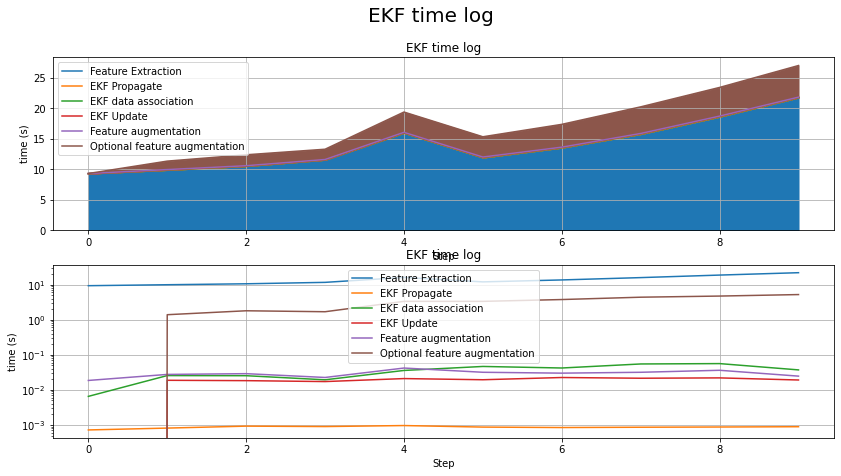

In [12]:
generic_simple_analysis_time(["feature_extraction", "ekf_propagate", "ekf_data_association", "ekf_update", "feature_augmentation", "bucket_augmentation"],
                        ["Feature Extraction", "EKF Propagate", "EKF data association", "EKF Update", "Feature augmentation", "Optional feature augmentation"],
                        "EKF time log")

# Feature augmentation and discovery

Verify the effect of feature augmentation on each map

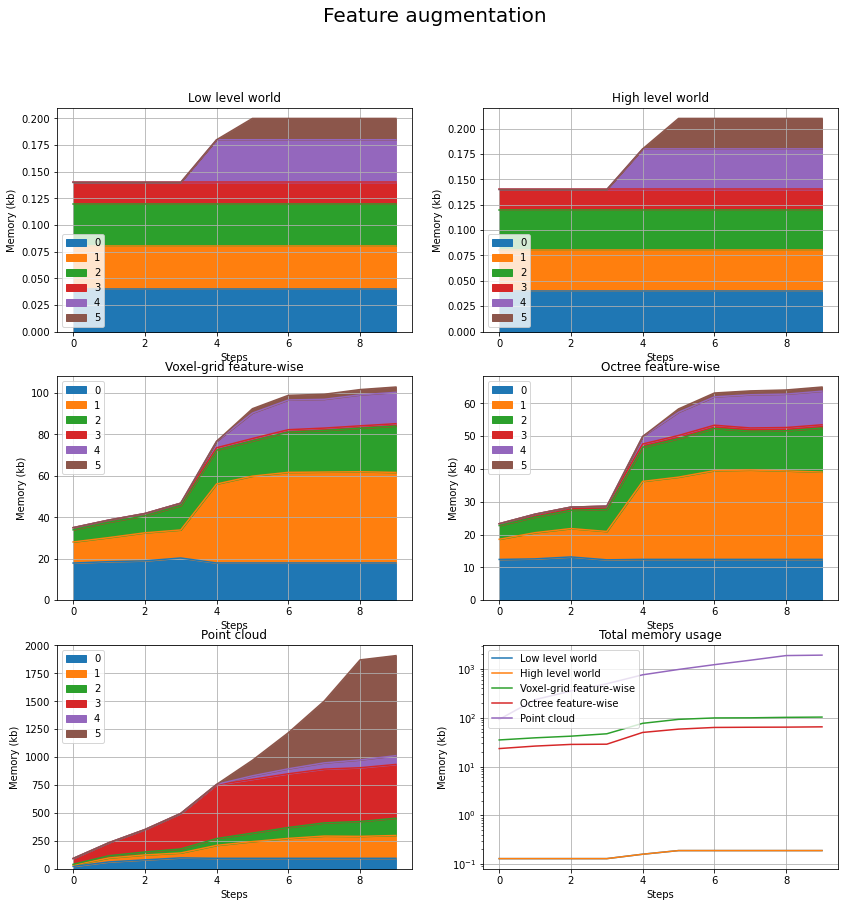

In [9]:
generic_5_analysis('low_level_world', 'high_level_world', 'voxel_grid_open3d', 'octree_open3d', 'pcd','Low level world', 'High level world', 'Voxel-grid feature-wise', 'Octree feature-wise', 'Point cloud', 'Feature augmentation')

# Vixed voxel size vs tree-truncation

The following analisys will capare a fixed step octree

- voxel_grid_open3d and octree_open3d (features along time)

- only_octree_open3d vs only_octree_truncate

In [129]:
def generic_4_analysis_with_time(name1, name2, name3, name4, desc_name1, desc_name2, desc_name3, desc_name4, title):
    # octree
    df_colored = pd.DataFrame.from_dict(d[name1], orient='index')
    df_colored = df_colored.drop(['total'], axis=1).fillna(0)
    df_colored = df_colored.div(1000).round(2)

    df_colorless = pd.DataFrame.from_dict(d[name2], orient='index')
    df_colorless = df_colorless.drop(['total'], axis=1).fillna(0)
    df_colorless = df_colorless.div(1000).round(2)
    
    df_colored2 = pd.DataFrame.from_dict(d[name3], orient='index')
    df_colored2 = df_colored2.drop(['total'], axis=1).fillna(0)
    df_colored2 = df_colored2.div(1000).round(2)

    df_colorless2 = pd.DataFrame.from_dict(d[name4], orient='index')
    df_colorless2 = df_colorless2.drop(['total'], axis=1).fillna(0)
    df_colorless2 = df_colorless2.div(1000).round(2)

    df_colored_total = pd.DataFrame.from_dict(d[name1], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total = pd.DataFrame.from_dict(d[name2], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colored_total2 = pd.DataFrame.from_dict(d[name3], orient='index')['total'].fillna(0).div(1000).round(2)
    df_colorless_total2 = pd.DataFrame.from_dict(d[name4], orient='index')['total'].fillna(0).div(1000).round(2)
    
    df_total = pd.concat([df_colored_total, df_colorless_total, df_colored_total2, df_colorless_total2], axis=1)

    time = pd.DataFrame.from_dict(d['time_log'], orient='index')
    time1 = time[name1]
    time2 = time[name2]
    time3 = time[name3]
    time4 = time[name4]
    df_total_time = pd.concat([time1, time2, time3, time4], axis=1)
    
    
    fig = plt.figure(figsize=(14,14))
    fig.suptitle(title, fontsize=20)
    
    gs = gridspec.GridSpec(3,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, :])
    
    ax6 = ax1.twinx()
    ax7 = ax2.twinx()
    ax8 = ax3.twinx()
    ax9 = ax4.twinx()
    ax10 = ax5.twinx()
    

    
    
    ax1 = df_colored.plot.area(ax=ax1)
    ax1.title.set_text(desc_name1)
    ax1.set_ylabel("Memory (kb)")
    ax1.grid()
    ax2 = df_colorless.plot.area(ax=ax2)
    ax2.title.set_text(desc_name2)
    ax2.set_ylabel("Memory (kb)")
    ax2.grid()
    
    
    ax3 = df_colored2.plot.area(ax=ax3)
    ax3.title.set_text(desc_name3)
    ax3.set_ylabel("Memory (kb)")
    ax3.grid()

    ax4 = df_colorless2.plot.area(ax=ax4)
    ax4.title.set_text(desc_name4)
    ax4.set_ylabel("Memory (kb)")
    ax4.grid()

    ax5 = df_total.plot(ax=ax5)
    ax5.title.set_text('Total memory usage')
    ax5.set_ylabel("Memory (kb)")
    ax5.grid()
    ax5.legend([desc_name1, desc_name2, desc_name3, desc_name4])
    
    ax6 = time1.plot(ax=ax6, ls = "--", linewidth=2, marker='o', color='k')
    ax6.set_xlabel("Steps")
    ax6.set_ylabel("time (s)")
    ax6.grid()
    
    ax7 = time2.plot(ax=ax7, ls = "--", linewidth=2, marker='o', color='k')
    ax7.set_xlabel("Steps")
    ax7.set_ylabel("time (s)")
    ax7.grid()
    
    ax8 = time3.plot(ax=ax8, ls = "--", linewidth=2, marker='o', color='k')
    ax8.set_xlabel("Steps")
    ax8.set_ylabel("time (s)")
    ax8.grid()
    
    ax9 = time4.plot(ax=ax9, ls = "--", linewidth=2, marker='o', color='k')
    ax9.set_xlabel("Steps")
    ax9.set_ylabel("time (s)")
    ax9.grid()

    ax10 = df_total_time.plot(ax=ax10, ls = "--", linewidth=2, marker='o')
    ax10.set_xlabel("Steps")
    ax10.set_ylabel("time (s)")
    ax10.grid()
    ax10.legend([desc_name1, desc_name2, desc_name3, desc_name4])
    
    ax1.set_yticks(calculate_ticks(ax1, 5))
    ax2.set_yticks(calculate_ticks(ax2, 5))
    ax3.set_yticks(calculate_ticks(ax3, 5))
    ax4.set_yticks(calculate_ticks(ax4, 5))
    ax5.set_yticks(calculate_ticks(ax5, 5))
    ax6.set_yticks(calculate_ticks(ax6, 5, round_to=0.001))
    ax7.set_yticks(calculate_ticks(ax7, 5, round_to=0.001))
    ax8.set_yticks(calculate_ticks(ax8, 5, round_to=0.001))
    ax9.set_yticks(calculate_ticks(ax9, 5, round_to=0.001))
    ax10.set_yticks(calculate_ticks(ax10, 5, round_to=0.01))
    
    fig.tight_layout()

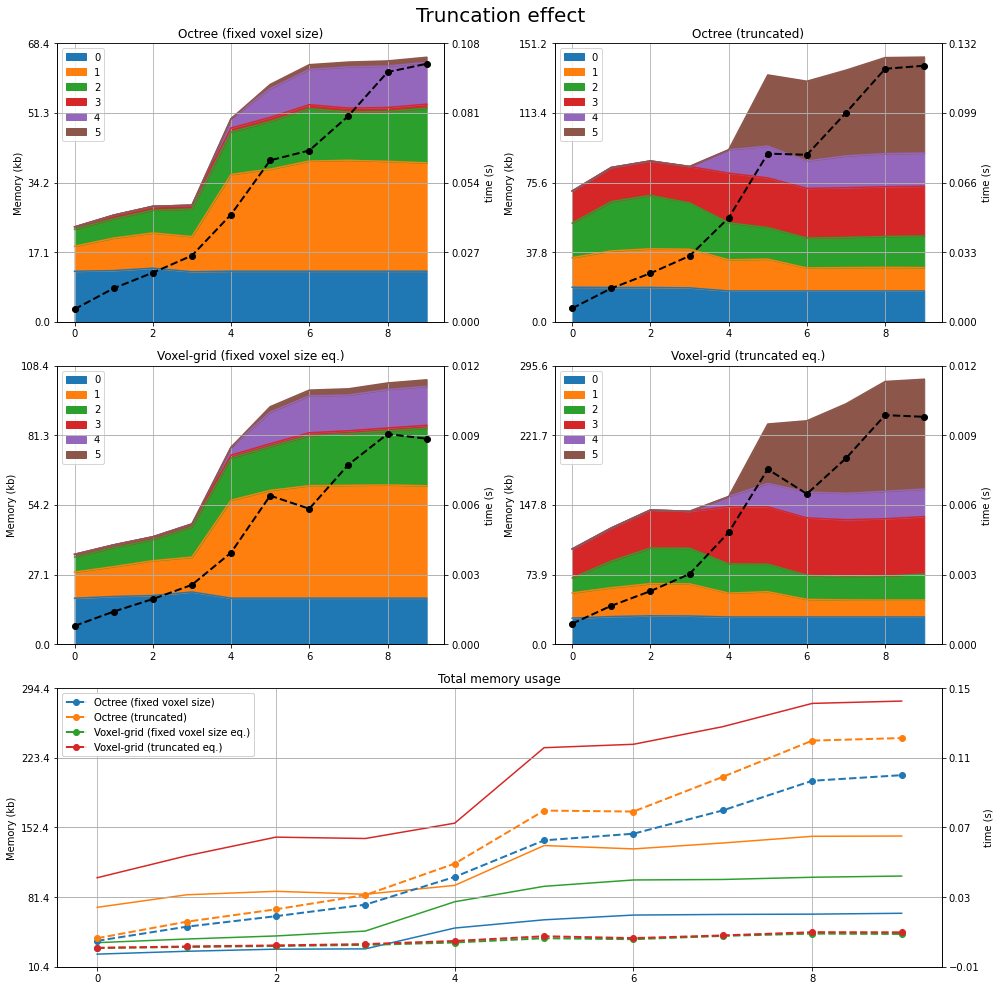

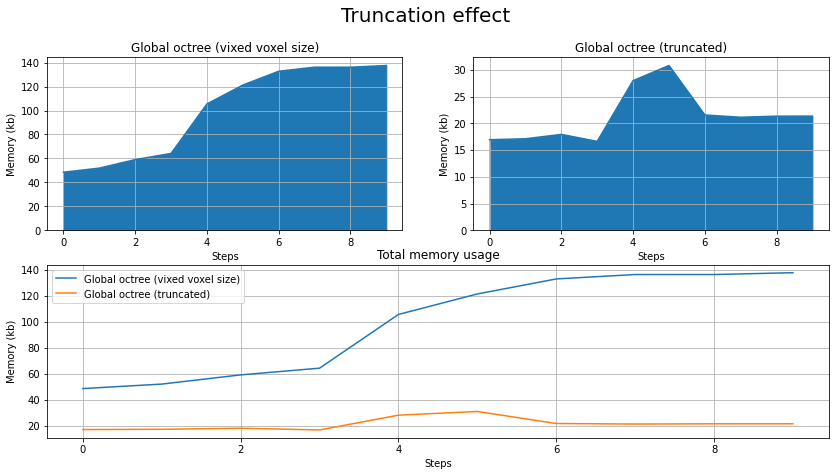

In [130]:
generic_4_analysis_with_time('octree_open3d', 'octree_truncate', 'voxel_grid_open3d', 'voxel_grid_truncate', 'Octree (fixed voxel size)', 'Octree (truncated)', 'Voxel-grid (fixed voxel size eq.)', 'Voxel-grid (truncated eq.)', 'Truncation effect')

generic_2_analysis_simple('only_octree', 'only_octree_truncate', 'Global octree (vixed voxel size)', 'Global octree (truncated)', 'Truncation effect')




# Octree vs voxel-grid

The following analisys will capare octree vs voxel-grid

- voxel_grid_open3d and octree_open3d (features along time)

- voxel_grid_truncate vs octree_truncate

- voxel_grid_open3d and octree_open3d (features along time)

- only_voxel_grid_truncate vs only_octree_truncate

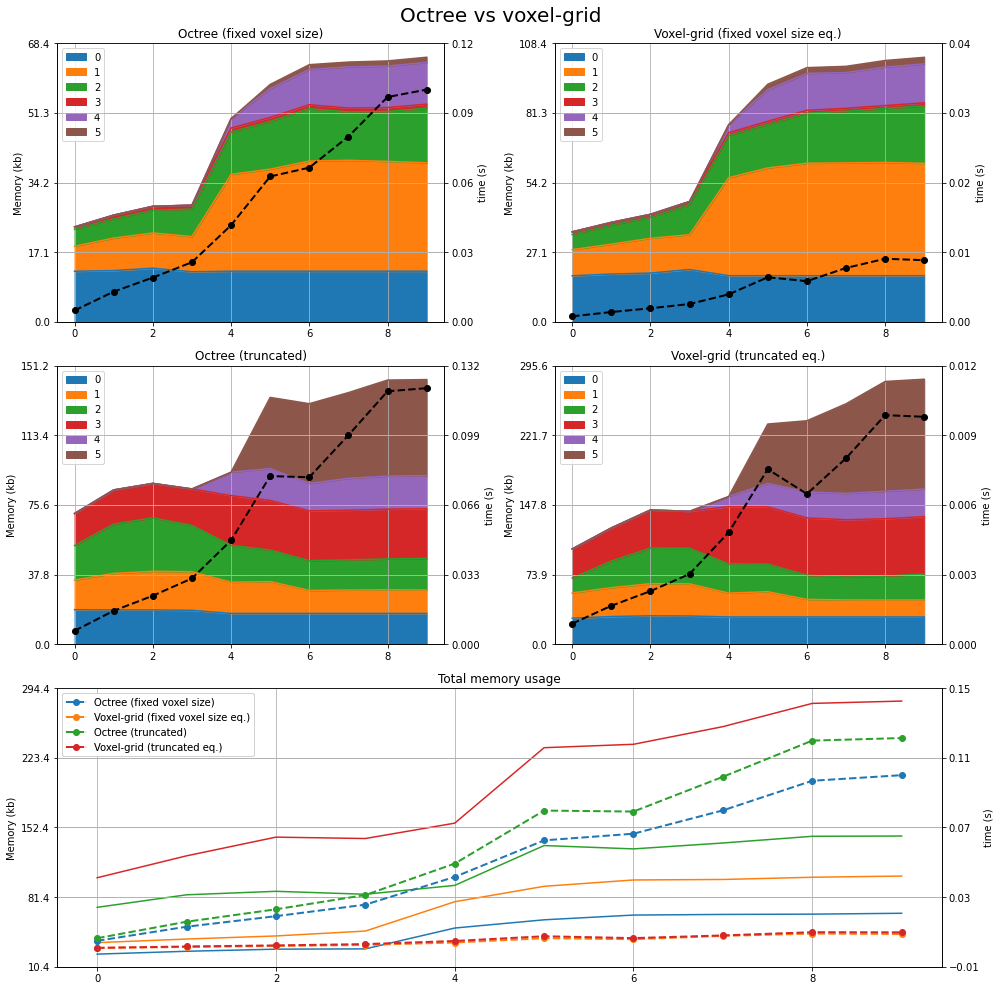

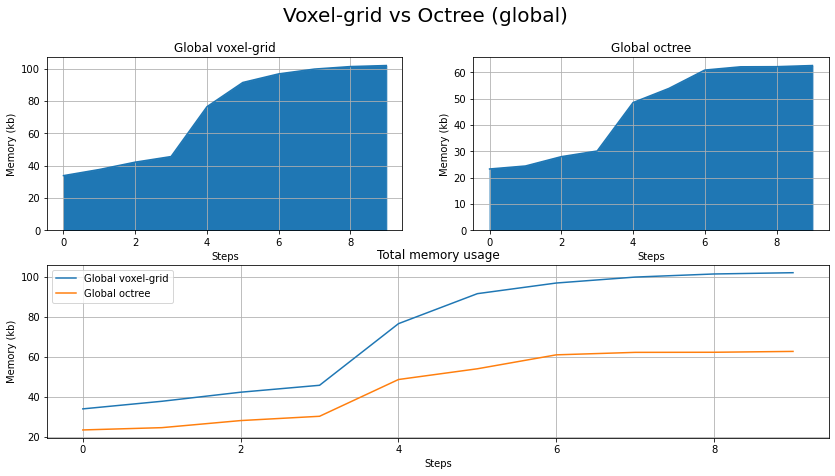

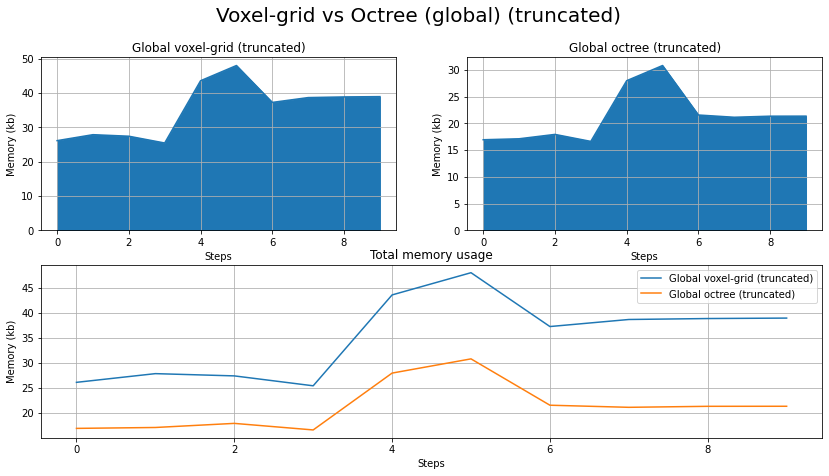

In [128]:
# generic_2_analysis('voxel_grid_open3d', 'octree_open3d', 'Voxel-grid', 'Octree', 'Voxel-grid vs Octree')
# generic_2_analysis('voxel_grid_truncate', 'octree_truncate', 'Voxel-grid truncated', 'Octree truncated', 'Voxel-grid vs Octree truncated')
generic_4_analysis_with_time('octree_open3d', 'voxel_grid_open3d', 'octree_truncate', 'voxel_grid_truncate', 'Octree (fixed voxel size)', 'Voxel-grid (fixed voxel size eq.)', 'Octree (truncated)', 'Voxel-grid (truncated eq.)', 'Octree vs voxel-grid')


# # Voxel grid
generic_2_analysis_simple('only_voxel_grid_open3d', 'only_octree_open3d', 'Global voxel-grid', 'Global octree', 'Voxel-grid vs Octree (global)')
generic_2_analysis_simple('only_voxel_grid_truncate', 'only_octree_truncate', 'Global voxel-grid (truncated)', 'Global octree (truncated)', 'Voxel-grid vs Octree (global) (truncated)')


# Memory storage method comparission

The following analisys will capare the use of a colored and colorless maps representation

- voxel_grid_open3d and voxel_grid (features along time)
- octree_open3d and octree (features along time)
- only_octree_open3d and only_octree
- only_voxel_grid_open3d (colored vs colorless)





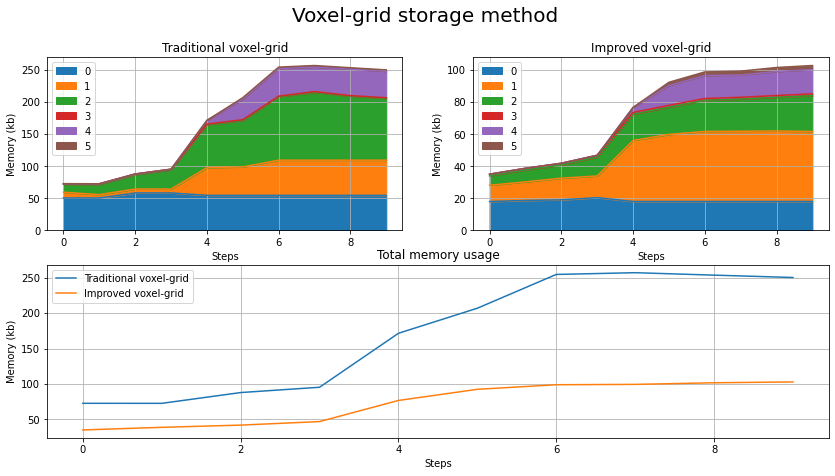

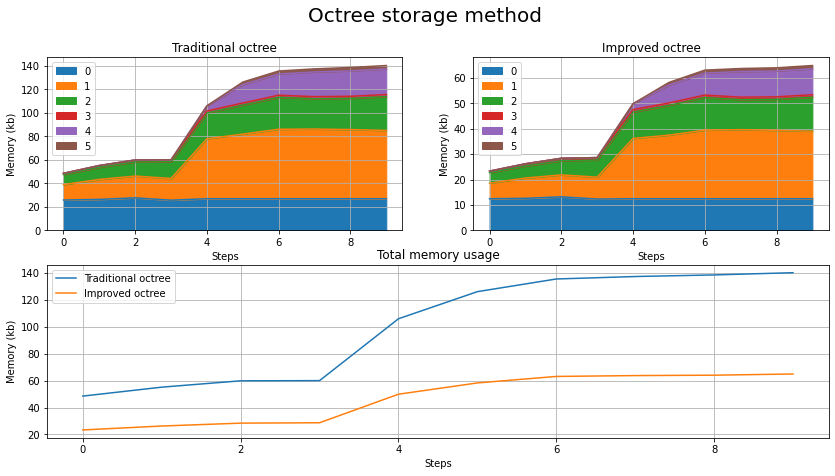

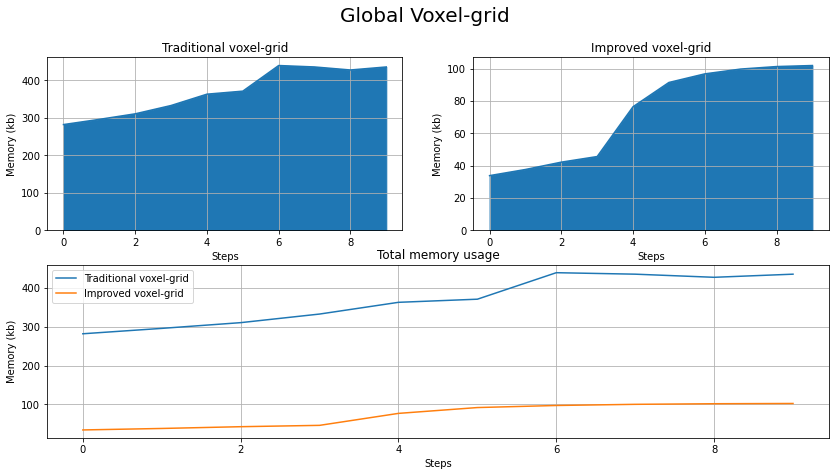

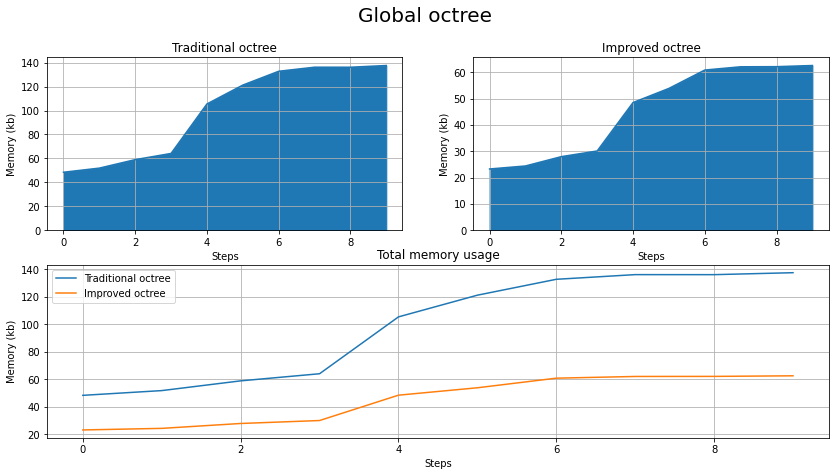

In [21]:
# Low level World
generic_2_analysis('voxel_grid', 'voxel_grid_open3d', 'Traditional voxel-grid', 'Improved voxel-grid', 'Voxel-grid storage method')

# High level World
generic_2_analysis('octree', 'octree_open3d', 'Traditional octree', 'Improved octree', 'Octree storage method')

# # Voxel grid
generic_2_analysis_simple('only_voxel_grid', 'only_voxel_grid_open3d', 'Traditional voxel-grid', 'Improved voxel-grid', 'Global Voxel-grid')

# # Octree
generic_2_analysis_simple('only_octree', 'only_octree_open3d', 'Traditional octree', 'Improved octree', 'Global octree')



# Feature-wise map vs Global feature map

The following analisys will capare:

- octree_open3d vs only_octree_open3d
- voxel_grid_open3d vs only_voxel_grid_open3d

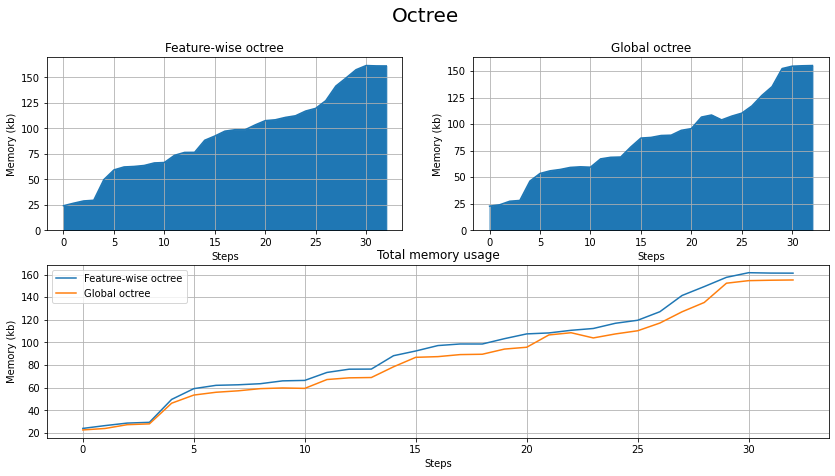

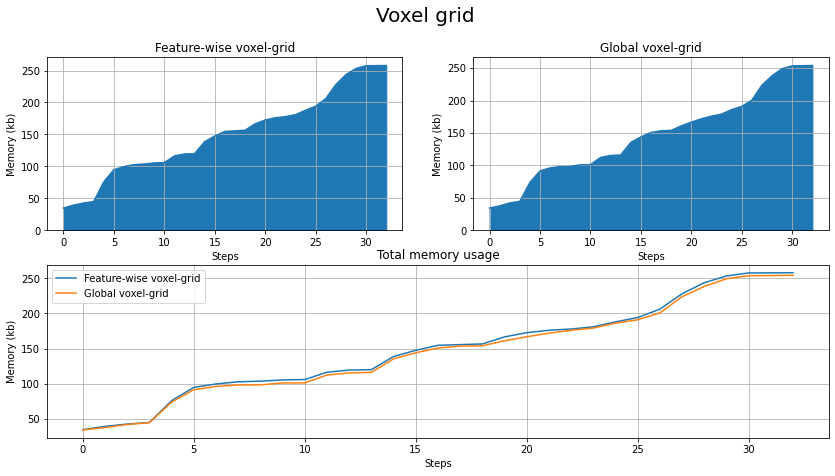

In [10]:
# # Octree
generic_2_analysis_simple('octree_open3d', 'only_octree_open3d', 'Feature-wise octree', 'Global octree', 'Octree')

# # Voxel grid
generic_2_analysis_simple('voxel_grid_open3d', 'only_voxel_grid_open3d', 'Feature-wise voxel-grid', 'Global voxel-grid', 'Voxel grid')

# Color comparission

The following analisys will capare the use of a colored and colorless maps representation

- Point cloud (features along time) (colored vs colorless)
- octree_open3d (features along time) (colored vs colorless)
- voxel_grid_open3d (features along time) (colored vs colorless)
- low_level_world (features along time) (colored vs colorless)
- high_level_world (features along time) (colored vs colorless)
- only_octree_open3d (colored vs colorless)
- only_voxel_grid_open3d (colored vs colorless)

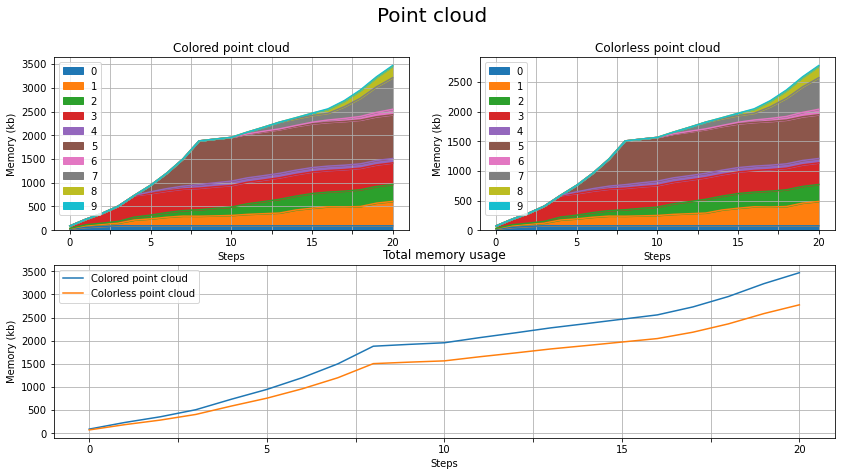

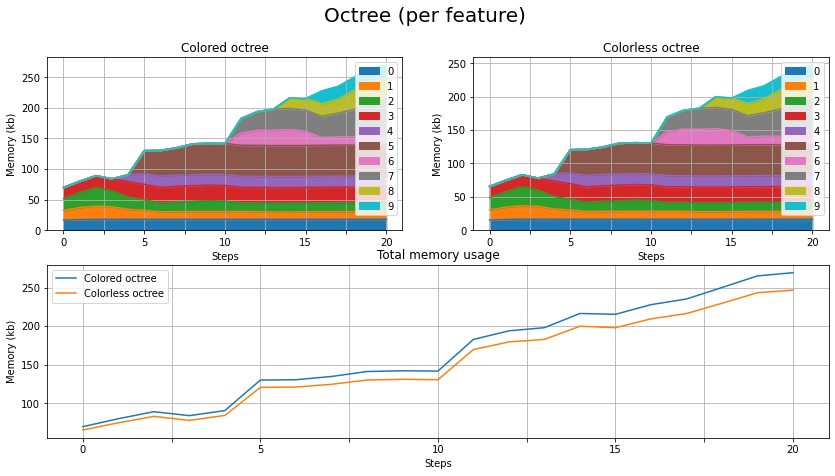

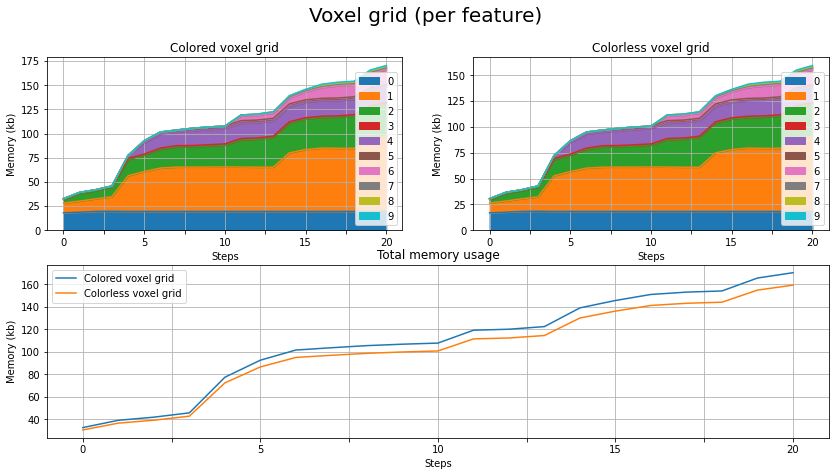

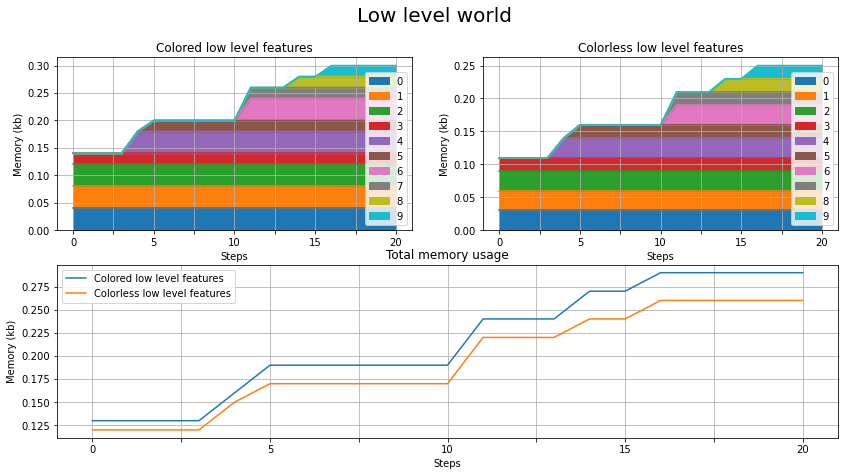

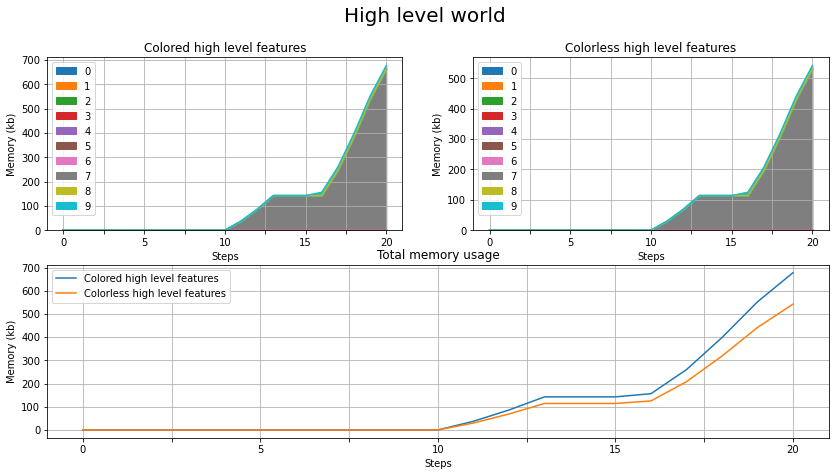

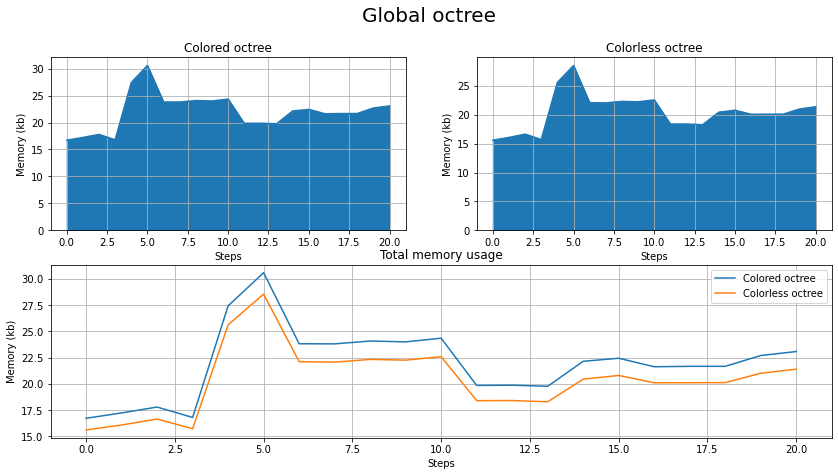

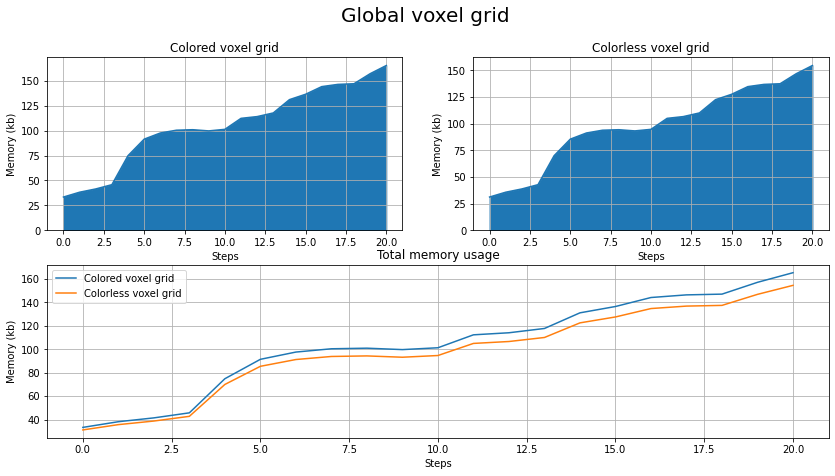

In [7]:
# Pointcloud
generic_2_analysis('pcd', 'pcd_colorless', 'Colored point cloud', 'Colorless point cloud', 'Point cloud')

# Octree per feature
generic_2_analysis('octree_open3d', 'octree_open3d_colorless', 'Colored octree', 'Colorless octree', 'Octree (per feature)')

# Voxel grid per feature
generic_2_analysis('voxel_grid_open3d', 'voxel_grid_open3d_colorless', 'Colored voxel grid', 'Colorless voxel grid', 'Voxel grid (per feature)')

# Low level World
generic_2_analysis('low_level_world', 'low_level_world_colorless', 'Colored low level features', 'Colorless low level features', 'Low level world')

# High level World
generic_2_analysis('high_level_world', 'high_level_world_colorless', 'Colored high level features', 'Colorless high level features', 'High level world')

# # Octree
generic_2_analysis_simple('only_octree_open3d', 'only_octree_open3d_colorless', 'Colored octree', 'Colorless octree', 'Global octree')

# # Voxel grid
generic_2_analysis_simple('only_voxel_grid_open3d', 'only_voxel_grid_open3d_colorless', 'Colored voxel grid', 'Colorless voxel grid', 'Global voxel grid')